In [1]:
import qiskit

In [2]:
qreg = qiskit.QuantumRegister(2)
creg = qiskit.ClassicalRegister(2)

circuit = qiskit.QuantumCircuit(qreg, creg)

In [3]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

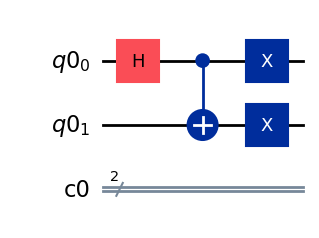

In [4]:
circuit.h(0)
circuit.cx(0, 1)
circuit.x(0)
circuit.x(1)
circuit.draw('mpl')

In [5]:
qiskit.quantum_info.Statevector.from_instruction(circuit)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.draw('mpl')

In [7]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile 

# Use AerSimulator
from qiskit_aer import Aer

backend = Aer.get_backend('qasm_simulator')

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(circuit, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend.run(qc_compiled, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [13]:
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'11': 1024}


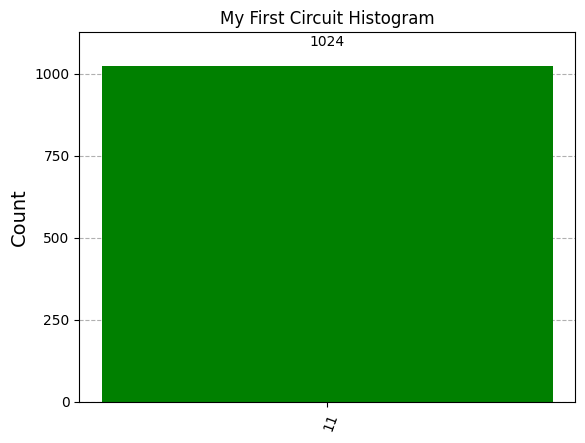

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, color='green', title="My First Circuit Histogram")

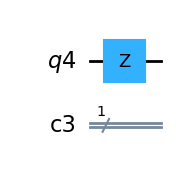

In [18]:
creg = qiskit.ClassicalRegister(1)
qreg = qiskit.QuantumRegister(1)

circuit = qiskit.QuantumCircuit(qreg, creg)

circuit.z(0)

circuit.draw('mpl')

In [19]:
qiskit.quantum_info.Statevector.from_instruction(circuit)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
